# Etape 1 : Chargement de l'image

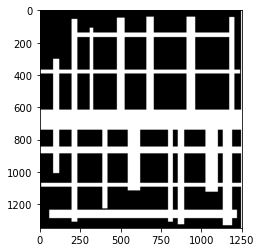

In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random
img = mpimg.imread("image.png")
plt.imshow(img)
plt.show()
#Sauvegarder
#mpimg.imsave("resultat.png", img)

# Etape 2 : Création de la matrice coût

In [2]:
img_int = np.zeros((img.shape[0],img.shape[1],1))
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i][j][0] == 1 and img[i][j][1] == 1 and img[i][j][2] == 1 :
            img_int[i][j] = 1
        else:
            img_int[i][j] = 1001
print("format img_int ",img_int.shape )
print("format img ",img.shape )
print("Valeur d'un pixel noir, image ",img[600][750])
print("Valeur d'un pixel noir, image int ",img_int[600][750])
print("Valeur d'un pixel blanc, image ",img[1000][1250])
print("Valeur d'un pixel blanc, image int ",img_int[1000][1250])

format img_int  (1346, 1254, 1)
format img  (1346, 1254, 3)
Valeur d'un pixel noir, image  [0. 0. 0.]
Valeur d'un pixel noir, image int  [1001.]
Valeur d'un pixel blanc, image  [1. 1. 1.]
Valeur d'un pixel blanc, image int  [1.]


# Etape 3 : Paramétrage du problème
### 	Création matrice de parcours
###	    Initialisation des voisins

In [3]:
import numpy as np

#Paramètre du problème
autonomie_initiale = 900
position_initiale=(700,300)
copie_milieu = img_int
Milieu = img_int
Anciens_Voisins = []
Distance = 100*np.ones((img_int.shape[0],img_int.shape[1]))

#Paramétrage de la zone et de la matrice déplacement
Distance[position_initiale] = autonomie_initiale

#Initialisation des 8 voisins
Voisins = []
Deplacement_Primaire = [(0,1),(1,1),(1,0),(1,-1),(0,-1),(-1,-1),(-1,0),(-1,1)]
for i in Deplacement_Primaire :
    Voisins.append((position_initiale[0]+i[0],position_initiale[1]+i[1]))
    Anciens_Voisins.append((position_initiale[0]+i[0],position_initiale[1]+i[1]))
print("Voisins ",Voisins)
   
Voisins=[position_initiale]
print(Voisins)
#Parcours

def affiche():
    print("       Milieu \n", Milieu)
    print("            Distance \n", Distance)
    print("Voisins : ", Voisins)
    return()



Voisins  [(700, 301), (701, 301), (701, 300), (701, 299), (700, 299), (699, 299), (699, 300), (699, 301)]
[(700, 300)]


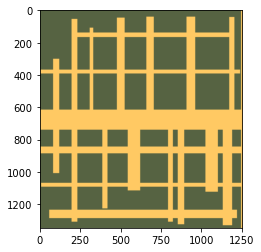

In [4]:
img_colorized = np.zeros((img.shape[0],img.shape[1],3))
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i][j][0] == 1 and img[i][j][1] == 1 and img[i][j][2] == 1 : # Blanc
            img_colorized[i][j][0] = 1
            img_colorized[i][j][1] = 0.79
            img_colorized[i][j][2] = 0.39 # sable
        else: # noir
            img_colorized[i][j][0] = 0.34
            img_colorized[i][j][1] = 0.39
            img_colorized[i][j][2] = 0.26 # vert foncé
plt.imshow(img_colorized)
plt.show()

# Etape 4 : Parcours de graphe

In [5]:
sommet_initial = Voisins[0]



while len(Voisins) > 0 :
    
    #  1-Partir d'une position sur le graphe
    #  2-Choisir le premier sommet de la pile
    #  3-Annoter les voisins de ce sommet
    #    a) Pour chaque voisins de ce sommet : 
    #      - Il fait partie de la frontière = > rien faire
    #      - Il est inconnu => calculer le déplacement, ajouter à la frontière, se retirer de la liste frontière
    
    sommet_initial = Voisins[0]
    for i in Deplacement_Primaire :
        if (0 <= sommet_initial[0]+i[0] <= Distance.shape[0]) and (0 <= sommet_initial[1]+i[1] <= Distance.shape[1]) :
            # Test si le sommet cible ne sort pas de la carte
            sommet_cible=((sommet_initial[0]+i[0],sommet_initial[1]+i[1]))
            if Distance[sommet_cible] == 100 : # sommet inconnu
                if Distance[sommet_initial]-Milieu[sommet_cible]>=0 : #deplacement possible
                    Distance[sommet_cible] = Distance[sommet_initial]-Milieu[sommet_cible]
                    img_colorized[sommet_cible][0] = 1
                    img_colorized[sommet_cible][1] = 0
                    img_colorized[sommet_cible][2] = 0 # rouge
                    if sommet_cible not in Voisins :
                        Voisins.append(sommet_cible)
                        Anciens_Voisins.append(sommet_cible)

    
    
    if sommet_initial in Voisins : 
        Voisins.remove(sommet_initial)

print("Graphe parcouru")



Graphe parcouru


# Etape 5 : Affichage matrice parcours

<function matplotlib.pyplot.show(close=None, block=None)>

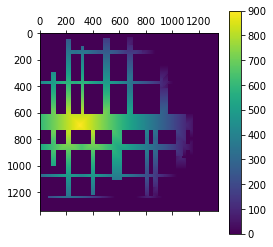

In [51]:
from matplotlib import pyplot as plt
ma_matrice = np.zeros((img_int.shape[0],img_int.shape[0]))
for i in range(Distance.shape[0]-100):
    for j in range(Distance.shape[1]-100):
        if Distance[i][j]==100 :
            ma_matrice[i][j]=0
        else:
            ma_matrice[i][j]=(Distance[i][j])

im1 = plt.matshow(ma_matrice)
plt.colorbar(im1)
plt.show

# Etape 6 : Coloration de l'image initiale

# Etape 7 : Affichage de l'isochrone

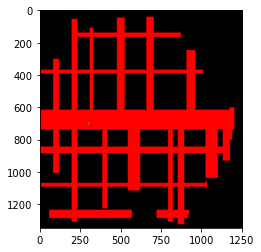

In [6]:
img_iso = img_colorized
for i in range(img_colorized.shape[0]-100):
    for j in range(img_colorized.shape[1]-100):
        #if 1 < ma_matrice[i][j] < 5 : 
            #img_iso[i][j][0] = max(1,img_iso[i][j][0] + (ma_matrice[i][j]/autonomie_initiale))/2
            #img_iso[i][j][1] = img_iso[i][j][1]/10
            #img_iso[i][j][2] = img_iso[i][j][2]/10
            # Courbe isochrone 
        if position_initiale[0]*0.95 < i < position_initiale[0]*1.05 and position_initiale[1]*0.95 < j < position_initiale[1]*1.05 :
            img_iso[i][j][0] = 0
            img_iso[i][j][1] = 1
            img_iso[i][j][2] = 0
            # Point rouge initial
plt.imshow(img_iso)
plt.show()

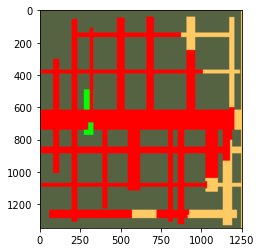

In [53]:
plt.imshow(img_colorized)